In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [2]:
model = YOLO("/Users/mn/neuefische/test/runs/detect/train/weights/best.pt")

In [3]:

# Load an image
#image_path = './data/PKLot/PKLot/PUCPR/Rainy/2012-09-16/2012-09-16_07_32_58.jpg'
image_path = './data/PKLot/PKLot/PUCPR/Rainy/2012-10-23/2012-10-23_08_15_50.jpg'
image = cv2.imread(image_path)


In [4]:
# 1: 'bicycle',
# 2: 'car',
# 3: 'motorcycle',
# 4: 'airplane',
# 5: 'bus',
# 6: 'train',
# 7: 'truck',
# Perform inference
results = model(image, conf=0.9) # [1, 2, 3, 5, 7], augment=True

#results = model(image, conf=0.0001, classes=[2, 6, 7], iou=0.3, device='cpu') # [1, 2, 3, 5, 7], augment=True
#results[0]



0: 384x640 7 emptys, 89 cars, 92.2ms
Speed: 1.8ms preprocess, 92.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


In [5]:
result = results[0]
len(result.boxes)

96

Object type: car
Coordinates: [846, 265, 887, 307]
Probability: 1.0
---
Object type: car
Coordinates: [734, 188, 770, 224]
Probability: 1.0
---
Object type: car
Coordinates: [650, 266, 693, 304]
Probability: 0.99
---
Object type: car
Coordinates: [808, 425, 858, 476]
Probability: 0.99
---
Object type: car
Coordinates: [535, 269, 581, 308]
Probability: 0.99
---
Object type: car
Coordinates: [481, 312, 530, 360]
Probability: 0.99
---
Object type: car
Coordinates: [726, 267, 772, 306]
Probability: 0.99
---
Object type: car
Coordinates: [954, 425, 1001, 484]
Probability: 0.99
---
Object type: car
Coordinates: [624, 423, 675, 474]
Probability: 0.99
---
Object type: car
Coordinates: [768, 188, 804, 223]
Probability: 0.99
---
Object type: car
Coordinates: [736, 151, 773, 183]
Probability: 0.99
---
Object type: car
Coordinates: [444, 316, 488, 356]
Probability: 0.99
---
Object type: car
Coordinates: [575, 269, 619, 307]
Probability: 0.99
---
Object type: car
Coordinates: [687, 264, 729, 306]
P

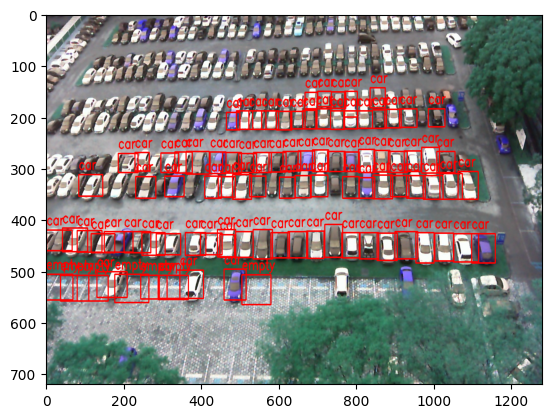

In [6]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  if True: # class_id == 'car' or class_id == 'truck' or class_id == 'bus':
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")
    
    # Split coordinates
    x1, y1, x2, y2 = cords
    
    if class_id == 'empty':
      color = (0, 255, 0)
    else:
      color = (255, 0, 0)
    
    # Draw rectangle (bounding box)
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

    # Put class label on the rectangle
    cv2.putText(image, str(class_id), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
  
# Save or display the image
plt.imshow(image, aspect='auto')
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [7]:
result.names

{0: 'empty', 1: 'car'}